## Train Machine Learning Model

In [1]:
# Loading libs
from astropy.io import fits #need to install the "astropy" package
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import os
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import cv2
from astro_package import plot_array_img as pai
from astro_package import load_astro_img as load_img
from astro_package import crop_img
from astro_package import evaluations

In [2]:
disk_class = load_img.AstroImgs('./target_goal/')
ref_class = load_img.AstroImgs('./refs/')

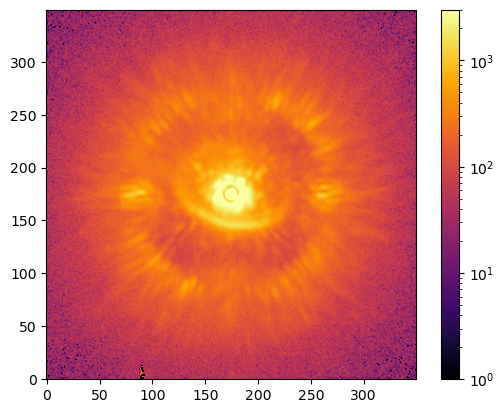

In [3]:
disk_imgs = disk_class.GetImg()
ref_imgs = ref_class.GetImg()
pai.PlotLogImg(disk_imgs[0])

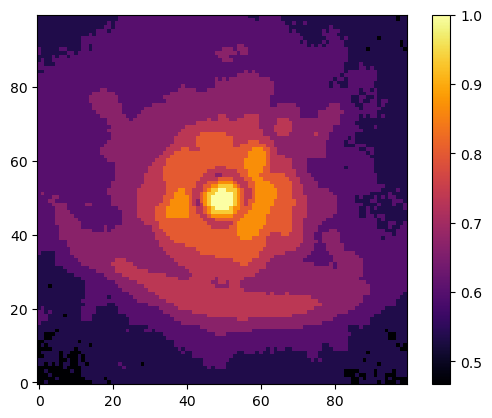

In [4]:
data = disk_imgs[0]
data = data[125:225, 125:225]
data[data <= 1] = 1
log_data = np.ceil(np.log2(data))
norm_data = log_data/np.max(log_data)
pai.PlotLinearImg(norm_data)

In [5]:
x_set = []
y_set = []
for x in disk_class.GetImg():
    data = x[125:225, 125:225]
    data[data <= 1] = 1
    log_data = np.ceil(np.log2(data))
    norm_data = log_data/np.max(log_data)
    x_set.append(norm_data)
    y_set.append(1)

for x in ref_class.GetImg():
    data = x[125:225, 125:225]
    data[data <= 1] = 1
    log_data = np.ceil(np.log2(data))
    norm_data = log_data/np.max(log_data)
    x_set.append(norm_data)
    y_set.append(0)

x_all = np.concatenate([x_set])
y_all = np.concatenate([y_set])

In [6]:
n_example = y_all.size
shuffle_index = np.arange(n_example)
np.random.shuffle(shuffle_index)
train_ratio = 0.85
x_train = x_all[shuffle_index[:int(np.ceil(n_example*train_ratio))]]
y_train = y_all[shuffle_index[:int(np.ceil(n_example*train_ratio))]]
x_test = x_all[shuffle_index[int(np.ceil(n_example*train_ratio)):]]
y_test = y_all[shuffle_index[int(np.ceil(n_example*train_ratio)):]]
# shuffle_index
# y_all.shape
# x_all.shape
print(x_train.shape, '\n', y_train.shape, n_example)

(1022, 100, 100) 
 (1022,) 1202


0


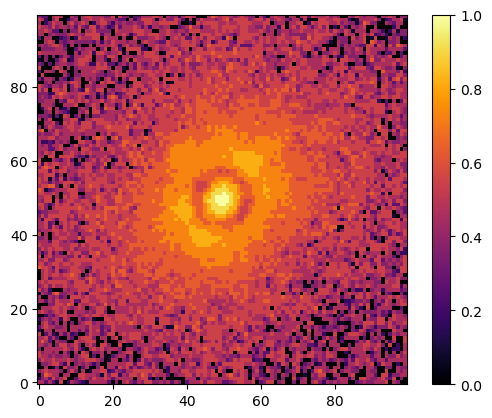

In [7]:
pai.PlotLinearImg(x_train[0])
print(y_train[0])

In [8]:
model = tf.keras.models.Sequential([
  # first conv layer
  tf.keras.layers.Conv2D(3, (3, 3), activation="relu", input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),
  # second conv layer
  # tf.keras.layers.Conv2D(200, (3, 3), activation="relu"),
  # tf.keras.layers.MaxPooling2D((2, 2), strides=2),
  tf.keras.layers.Flatten(),
  # hidden layer and output layer
  tf.keras.layers.Dense(4, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
predictions = model(x_train[:1]).numpy()
print(predictions)
print(y_train[:1])
print(tf.nn.softmax(predictions).numpy())
print(loss_fn(y_train[:1], predictions).numpy())

[[0. 0.]]
[0]
[[0.5 0.5]]
0.6931472


In [10]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 15ms/step - loss: 0.5723 - accuracy: 0.7701
Epoch 2/20
32/32 [==============================] - 0s 15ms/step - loss: 0.5295 - accuracy: 0.7701
Epoch 3/20
32/32 [==============================] - 0s 15ms/step - loss: 0.4100 - accuracy: 0.7701
Epoch 4/20
32/32 [==============================] - 0s 15ms/step - loss: 0.3233 - accuracy: 0.7701
Epoch 5/20
32/32 [==============================] - 0s 15ms/step - loss: 0.3077 - accuracy: 0.8297
Epoch 6/20
32/32 [==============================] - 0s 15ms/step - loss: 0.2863 - accuracy: 0.8571
Epoch 7/20
32/32 [==============================] - 0s 15ms/step - loss: 0.2739 - accuracy: 0.8708
Epoch 8/20
32/32 [==============================] - 0s 15ms/step - loss: 0.2612 - accuracy: 0.8914
Epoch 9/20
32/32 [==============================] - 1s 16ms/step - loss: 0.2644 - accuracy: 0.8748
Epoch 10/20
32/32 [==============================] - 0s 15ms/step - loss: 0.2439 - accuracy: 0.9070
Epoch 11/

In [11]:
model.evaluate(x_test,  y_test, verbose=2)

6/6 - 0s - loss: 0.1807 - accuracy: 0.9500 - 139ms/epoch - 23ms/step


[0.18065056204795837, 0.949999988079071]

In [12]:
evaluations.EvalPositiveExamples(model, x_test, y_test)

error = 0.13333333333333333
correct = 0.8666666666666667


NameError: name 'img' is not defined

In [14]:
predictions = model(x_test[:1]).numpy()
tf.nn.softmax(predictions).numpy()

array([[0.77611774, 0.22388224]], dtype=float32)

In [174]:
# for i, label in enumerate(np.argmax(prediction.numpy(), axis=1)):
#     if label == 1:
#         fig = plt.figure(figsize = (6, 4))
#         pai.PlotLinearImg(x_test[i])
        

In [15]:
# dir(model)
conv_layer = model.layers[0]
maxpool_layer = model.layers[1]
# dir(conv_layer)

[[ 0.47966334  0.39900702 -0.26357758]
 [-0.05405949  0.3677917   0.4819475 ]
 [-0.24828272  0.02666912 -0.02445185]]
sum = 1.1647071093320847
[[ 0.01920728 -0.23425624 -0.19008885]
 [-0.11775346 -0.11715744  0.20281367]
 [ 0.360158    0.19014269  0.0692481 ]]
sum = 0.18231376260519028
[[-0.27609843  0.07788757 -0.22440721]
 [-0.19479044  0.29009384  0.05133301]
 [-0.09668794  0.43722036 -0.23722166]]
sum = -0.17267084121704102


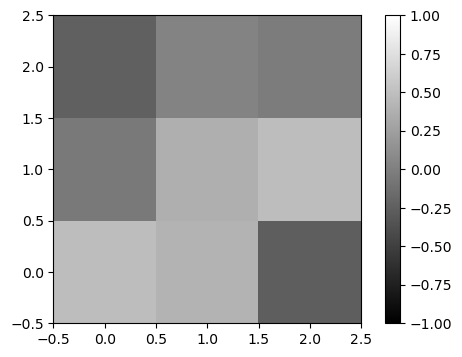

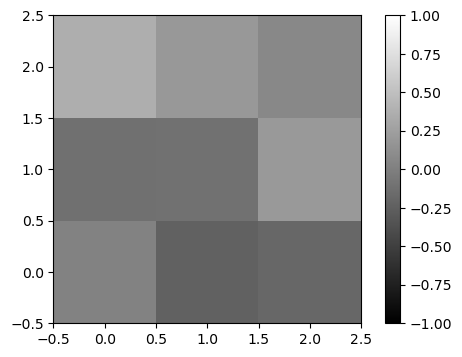

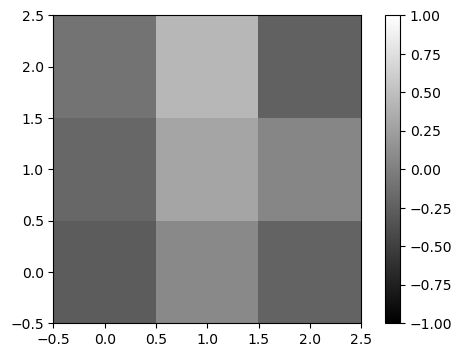

In [16]:
kernels = conv_layer.kernel.numpy()
pai.PlotConv2dKernels(kernels)

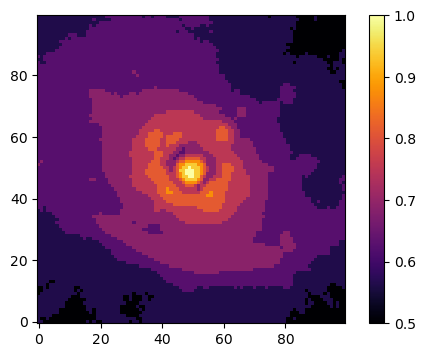

<Figure size 600x400 with 0 Axes>

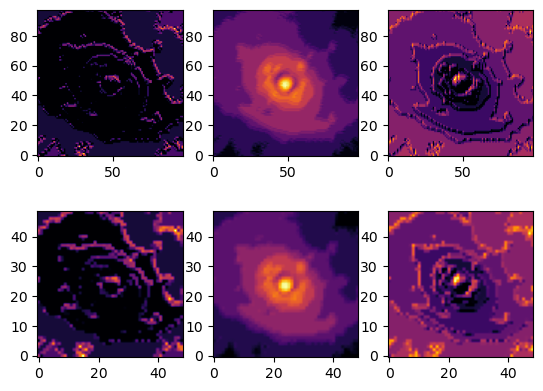

In [17]:
i = 5
fig = plt.figure(figsize = (6, 4))
pai.PlotLinearImg(x_test[i])
x = x_test[i].reshape(-1, 100, 100, 1)
x_conv = conv_layer(x)
x_maxpool = maxpool_layer(x_conv)
kernel_size = (x_conv.shape)[3]
conv_imgs = x_conv.numpy()
maxpool_imgs = x_maxpool.numpy()
fig, axs = plt.subplots(2, kernel_size)
for k in range(kernel_size):
    # fig = plt.figure(figsize = (6, 4))
    pai.SubplotImg(axs[0, k], conv_imgs[0, :, :, k])
    pai.SubplotImg(axs[1, k], maxpool_imgs[0, :, :, k])

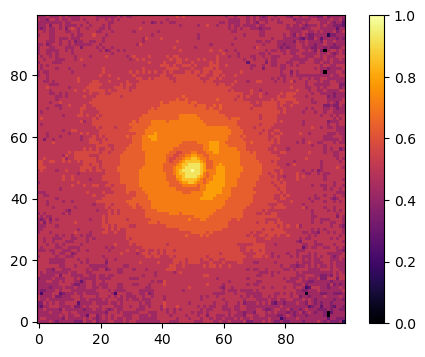

<Figure size 600x400 with 0 Axes>

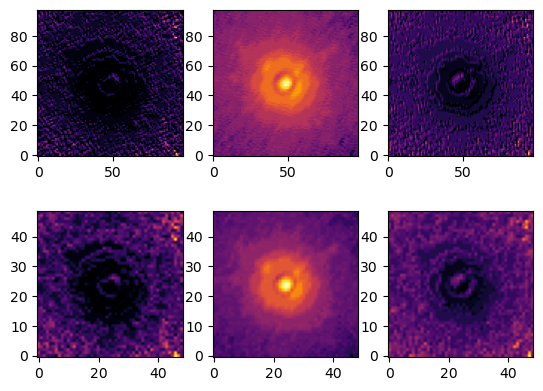

In [44]:
i = 2
fig = plt.figure(figsize = (6, 4))
pai.PlotLinearImg(x_test[i])
x = x_test[i].reshape(-1, 100, 100, 1)
x_conv = conv_layer(x)
x_maxpool = maxpool_layer(x_conv)
kernel_size = (x_conv.shape)[3]
conv_imgs = x_conv.numpy()
maxpool_imgs = x_maxpool.numpy()
fig, axs = plt.subplots(2, kernel_size)
for k in range(kernel_size):
    # fig = plt.figure(figsize = (6, 4))
    pai.SubplotImg(axs[0, k], conv_imgs[0, :, :, k])
    pai.SubplotImg(axs[1, k], maxpool_imgs[0, :, :, k])

In [19]:
dense_layer = model.layers[3]
dense_kernel = dense_layer.kernel.numpy()
dense_kernel.shape

(7203, 4)

In [20]:
flatten_layer = model.layers[2]

x_after_conv = (1, 98, 98, 3)
x_after_maxpool = (1, 49, 49, 3)
x_after_flatten = (1, 7203)
x_after_dense = (1, 4)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)


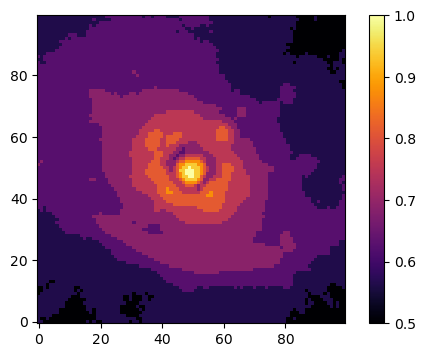

In [31]:
i = 5
fig = plt.figure(figsize = (6, 4))
pai.PlotLinearImg(x_test[i])
x = x_test[i].reshape(-1, 100, 100, 1)
x_conv = conv_layer(x)
print('x_after_conv =', x_conv.shape)
x_conv = maxpool_layer(x_conv)
print('x_after_maxpool =', x_conv.shape)
x_conv = flatten_layer(x_conv)
print('x_after_flatten =', x_conv.shape)
x_conv = dense_layer(x_conv)
print('x_after_dense =', x_conv.shape)
print(x_conv)

In [22]:
# Check all positive example x_conv
for i, label in enumerate(np.argmax(prediction.numpy(), axis=1)):
    if label == 1:
        # fig = plt.figure(figsize = (6, 4))
        # pai.PlotLinearImg(x_test[i])
        x = x_test[i].reshape(-1, 100, 100, 1)
        x_conv = conv_layer(x)
        x_conv = maxpool_layer(x_conv)
        x_conv = flatten_layer(x_conv)
        x_conv = dense_layer(x_conv)
        print(x_conv)

tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[0. 0. 0. 0.]], shape=(1, 4), dtype=f

In [23]:
# Check all negative example x_conv
for i, label in enumerate(np.argmax(prediction.numpy(), axis=1)):
    if label == 0:
        # fig = plt.figure(figsize = (6, 4))
        # pai.PlotLinearImg(x_test[i])
        x = x_test[i].reshape(-1, 100, 100, 1)
        x_conv = conv_layer(x)
        x_conv = maxpool_layer(x_conv)
        x_conv = flatten_layer(x_conv)
        x_conv = dense_layer(x_conv)
        print(x_conv)

tf.Tensor([[0.        0.        3.3008072 0.       ]], shape=(1, 4), dtype=float32)
tf.Tensor([[0.        0.        1.3600855 0.       ]], shape=(1, 4), dtype=float32)
tf.Tensor([[ 0.        0.       10.478509  0.      ]], shape=(1, 4), dtype=float32)
tf.Tensor([[ 0.       0.      17.18616  0.     ]], shape=(1, 4), dtype=float32)
tf.Tensor([[0.       0.       8.832752 0.      ]], shape=(1, 4), dtype=float32)
tf.Tensor([[ 0.        0.       14.605594  0.      ]], shape=(1, 4), dtype=float32)
tf.Tensor([[ 0.        0.       10.226739  0.      ]], shape=(1, 4), dtype=float32)
tf.Tensor([[ 0.        0.       18.028976  0.      ]], shape=(1, 4), dtype=float32)
tf.Tensor([[ 0.        0.       27.985085  0.      ]], shape=(1, 4), dtype=float32)
tf.Tensor([[0.        0.        6.2010283 0.       ]], shape=(1, 4), dtype=float32)
tf.Tensor([[ 0.        0.       21.974054  0.      ]], shape=(1, 4), dtype=float32)
tf.Tensor([[ 0.        0.       12.687721  0.      ]], shape=(1, 4), dtype=float32)


In [24]:
reg_layer = model.layers[4]
reg_kernel = reg_layer.kernel.numpy()
print(reg_kernel)

[[ 0.852273   -0.3781476 ]
 [ 0.5058415   0.80687165]
 [-0.0251086  -0.60841227]
 [ 0.20539618  0.89676595]]


In [25]:
x_conv = reg_layer(x_conv)
x_conv

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.49676722, -3.431046  ]], dtype=float32)>

# Inspect Dense Layer

In [33]:
d1 = dense_kernel[:, 0]

In [52]:
# d1.size
# d1 = d1.reshape(49, 49, 3)
# k = d1[:, :, 0]
# k.shape
dense_kernel.shape[-1]

4

In [42]:
d1.shape[-1]

3

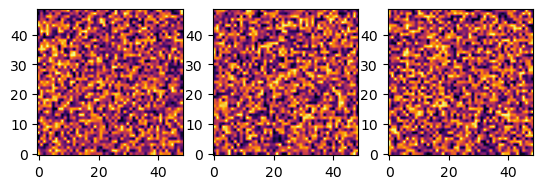

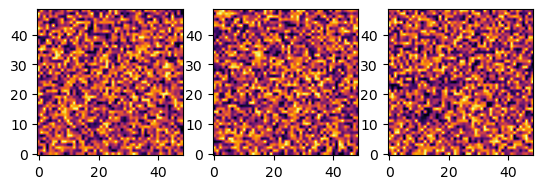

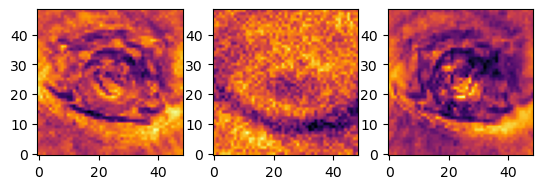

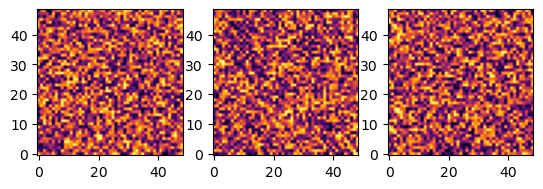

In [54]:
for j in range(dense_kernel.shape[-1]):
    fig, axs = plt.subplots(1, d1.shape[-1])
    d = dense_kernel[:, j]
    d = d.reshape(49, 49, 3)
    for i in range(d1.shape[-1]):
        pai.SubplotImg(axs[i], d[:, :, i])
